# Inference for Unet using ONNX Runtime


## 导包

In [1]:
import onnxruntime as ort

from PIL import Image
import matplotlib.pyplot as plt

import numpy as np
import os 

## 读取图片

<class 'PIL.JpegImagePlugin.JpegImageFile'>
(1918, 1280)


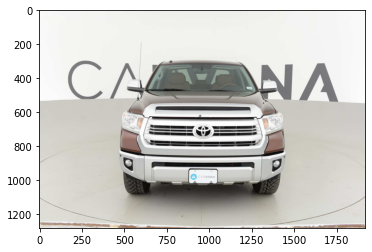

In [2]:
img = Image.open(os.path.join("images", "input.jpg"))
print(type(img))
print(img.size)
plt.imshow(img)

#### PIL -> ndarray

In [3]:
img = np.array(img)
print(type(img))
print(img.shape)
print(img[0][0])
print(img.dtype)

<class 'numpy.ndarray'>
(1280, 1918, 3)
[249 249 249]
uint8


#### 换dims & 增加dims

In [4]:
img = img.transpose((2, 0, 1))
print(type(img))
print(img.shape)
print(img[0][0])
print(img.dtype)

<class 'numpy.ndarray'>
(3, 1280, 1918)
[249 249 249 ... 249 249 249]
uint8


In [5]:
img = np.expand_dims(img, axis=0)
print(type(img))
print(img.shape)
print(img[0][0])
print(img.dtype)

<class 'numpy.ndarray'>
(1, 3, 1280, 1918)
[[249 249 249 ... 249 249 249]
 [249 249 249 ... 249 249 249]
 [249 249 249 ... 249 249 249]
 ...
 [232 233 234 ... 179 180 180]
 [231 232 233 ... 194 194 195]
 [230 231 232 ... 208 207 209]]
uint8


#### uint8 -> float

In [6]:
if img.max() > 1:
    img = img / 255

print(type(img))
print(img.shape)
print(img[0][0])
print(img.dtype)

<class 'numpy.ndarray'>
(1, 3, 1280, 1918)
[[0.97647059 0.97647059 0.97647059 ... 0.97647059 0.97647059 0.97647059]
 [0.97647059 0.97647059 0.97647059 ... 0.97647059 0.97647059 0.97647059]
 [0.97647059 0.97647059 0.97647059 ... 0.97647059 0.97647059 0.97647059]
 ...
 [0.90980392 0.91372549 0.91764706 ... 0.70196078 0.70588235 0.70588235]
 [0.90588235 0.90980392 0.91372549 ... 0.76078431 0.76078431 0.76470588]
 [0.90196078 0.90588235 0.90980392 ... 0.81568627 0.81176471 0.81960784]]
float64


In [7]:
img = img.astype(np.float32)
print(type(img))
print(img.shape)
print(img[0][0])
print(img.dtype)

<class 'numpy.ndarray'>
(1, 3, 1280, 1918)
[[0.9764706  0.9764706  0.9764706  ... 0.9764706  0.9764706  0.9764706 ]
 [0.9764706  0.9764706  0.9764706  ... 0.9764706  0.9764706  0.9764706 ]
 [0.9764706  0.9764706  0.9764706  ... 0.9764706  0.9764706  0.9764706 ]
 ...
 [0.9098039  0.9137255  0.91764706 ... 0.7019608  0.7058824  0.7058824 ]
 [0.90588236 0.9098039  0.9137255  ... 0.7607843  0.7607843  0.7647059 ]
 [0.9019608  0.90588236 0.9098039  ... 0.8156863  0.8117647  0.81960785]]
float32


## 准备模型

In [8]:
sess = ort.InferenceSession("model/unet.onnx")

In [9]:
import onnxruntime as ort
sess = ort.InferenceSession('model/unet.onnx')
# see what providers are enabled by default
# e.g. ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider'] ordered by priority
sess.get_providers()
# override and set to CPU
sess.set_providers(['CPUExecutionProvider'])

#### 模型输入

In [10]:
input_name = sess.get_inputs()[0].name
print("Input name  :", input_name)
input_shape = sess.get_inputs()[0].shape
print("Input shape :", input_shape)
input_type = sess.get_inputs()[0].type
print("Input type  :", input_type)

Input name  : input_0
Input shape : [1, 3, 1280, 1918]
Input type  : tensor(float)


#### 模型输出

In [11]:
output_name = sess.get_outputs()[0].name
print("Output name  :", output_name)  
output_shape = sess.get_outputs()[0].shape
print("Output shape :", output_shape)
output_type = sess.get_outputs()[0].type
print("Output type  :", output_type)

Output name  : output_0
Output shape : [1, 1, 1280, 1918]
Output type  : tensor(float)


In [12]:
%%time
result = sess.run([output_name], {input_name: img})

CPU times: user 1min 37s, sys: 5.62 s, total: 1min 43s
Wall time: 8.98 s


In [13]:
print(type(result))
result

<class 'list'>


[array([[[[-8.236774 , -7.460235 , -7.80444  , ..., -6.4194036,
           -6.549826 , -7.6145983],
          [-7.8025985, -6.8013315, -7.288973 , ..., -4.882376 ,
           -5.107775 , -6.5950365],
          [-8.625327 , -8.023754 , -8.351348 , ..., -5.3529453,
           -5.5408716, -6.818931 ],
          ...,
          [-9.435767 , -9.303307 , -9.805478 , ..., -6.072542 ,
           -5.5955753, -6.612612 ],
          [-8.776182 , -8.4850855, -9.11446  , ..., -4.8904195,
           -4.7131276, -6.1004786],
          [-8.981799 , -8.70429  , -9.202903 , ..., -6.342204 ,
           -6.3344016, -7.395593 ]]]], dtype=float32)]

## 结果显示

In [14]:
res = np.array(result[0][0][0])
print(type(res))
print(res.shape)

<class 'numpy.ndarray'>
(1280, 1918)


In [15]:
res

array([[-8.236774 , -7.460235 , -7.80444  , ..., -6.4194036, -6.549826 ,
        -7.6145983],
       [-7.8025985, -6.8013315, -7.288973 , ..., -4.882376 , -5.107775 ,
        -6.5950365],
       [-8.625327 , -8.023754 , -8.351348 , ..., -5.3529453, -5.5408716,
        -6.818931 ],
       ...,
       [-9.435767 , -9.303307 , -9.805478 , ..., -6.072542 , -5.5955753,
        -6.612612 ],
       [-8.776182 , -8.4850855, -9.11446  , ..., -4.8904195, -4.7131276,
        -6.1004786],
       [-8.981799 , -8.70429  , -9.202903 , ..., -6.342204 , -6.3344016,
        -7.395593 ]], dtype=float32)

In [16]:
# res= Image.open("1.png")
# mat = np.array(src)
res = res.astype(np.uint8)
res = Image.fromarray(res, 'P')
# dst.save('new.png')
print(type(res))

<class 'PIL.Image.Image'>


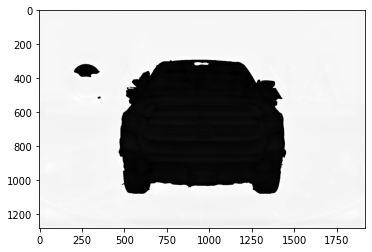

In [17]:
plt.imshow(res)